一．生成两个随机向量，每个向量包含10个数字，编程计算余弦相似度。输出两个随机向量及其相似性。将程序运行结果复制到答卷中。

$$\frac{\sum{x_i\times y_i}}{\sqrt{\sum{x_i^2}}\times\sqrt{\sum{y_i^2}}}$$

In [1]:
import string
import random

n=10
pool=string.digits
x=list("".join(random.choices(pool,k=n)))
y=list("".join(random.choices(pool,k=n)))
print(x,y)
zero_list=['0']*n
if x==zero_list or y==zero_list:
    print(1 if x==y else 0)
else:
    Sxy=0
    Sxx=0
    Syy=0
    for i in range(n):
        Sxy=int(x[i])*int(y[i])+Sxy
        Sxx=int(x[i])*int(x[i])+Sxx
        Syy=int(y[i])*int(y[i])+Syy
    print(Sxy/(Sxx**0.5*Syy**0.5))

['7', '6', '6', '3', '6', '9', '4', '8', '9', '1'] ['3', '5', '1', '0', '9', '2', '7', '2', '4', '2']
0.7510038212631108


二．斐波拉契数列的前两项都是1，从第三项开始，每一项都等于前两项之和。定义两个函数求斐波拉契数列的第n项（n<=50）的函数，一个使用递归fbnq_r，一个非递归fbnq，主程序中输入一个整数n，输出斐波拉契数列的第n项。

In [2]:
def fbnq_r(n):
    if n==1 or n==2:
        return 1
    else:
        return fbnq_r(n-2)+fbnq_r(n-1)

def fbnq(n):
    if n==1 or n==2:
        return 1
    else:
        l=0
        m=1
        r=1
        for i in range(n-2):
            l=m
            m=r
            r=l+m
        return r

n=int(input())
print(fbnq_r(n))
print(fbnq(n))

 6


8
8


三．完成一个系统登录测试模块。随机生成5位测试码（每一位是一个数字），让用户输入测试码，如果匹配，显示你的姓名学号, 如果不匹配，再次生成测试码，让用户重新输入测试码。用户一共有3次输入机会。如果3次都失败，显示“Goodbye”，结束程序。

In [3]:
import string
import random

pool=string.digits

for i in range(3):
    code="".join(random.choices(pool,k=5))
    print(code)
    if input()==code:
        print("Validated")
        break
    if i==2:
        print("Goodbye")

97044


 11111


44872


 22222


03630


 33333


Goodbye


四．2020年3.1-3.21意大利、西班牙、德国感染冠状病毒（Coronavirus-19）和死亡人数统计如下，包括每日新增确诊，新增死亡人数。编程完成以下功能。

1.绘图区域分为上下两个子绘图区域，上图绘制三条曲线，分别是三国的每日确诊人数，下图绘制三条曲线，是三国的每日死亡人数。

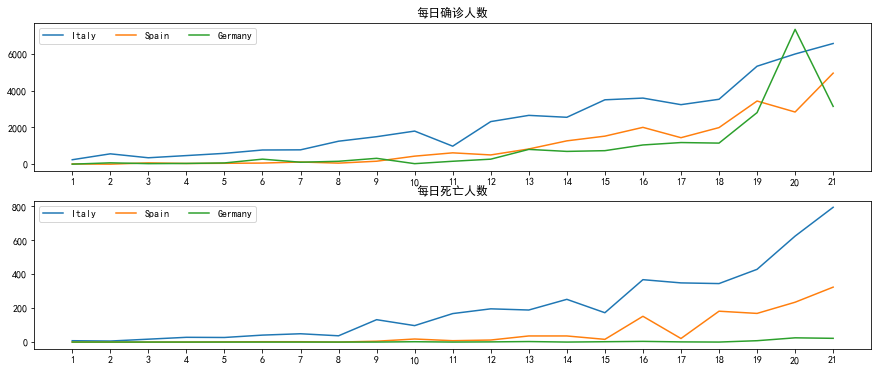

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
data = pd.read_csv("3.1-3.21意、西、德感染和死亡人数.csv", dtype=str, sep=',')

t=data['Days']
x=data.index
label=['Italy','Spain','Germany']
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)
Y=[0,0,0]
Y[0]=list(map(int,data['Italy+']))
Y[1]=list(map(int,data['Spain+']))
Y[2]=list(map(int,data['Germany+']))
for i in range(3):
    plt.plot(x,Y[i],label=label[i])
plt.xticks(x, t)
plt.legend(loc=2,ncol=3)
plt.title("每日确诊人数")

plt.subplot(2,1,2)
Y=[0,0,0]
Y[0]=list(map(int,data['Italy-']))
Y[1]=list(map(int,data['Spain-']))
Y[2]=list(map(int,data['Germany-']))
for i in range(3):
    plt.plot(x,Y[i],label=label[i])
plt.xticks(x, t)
plt.legend(loc=2,ncol=3)
plt.title("每日死亡人数")

plt.show()

2.根据意大利的每日新增确诊人数，绘制箱形图。

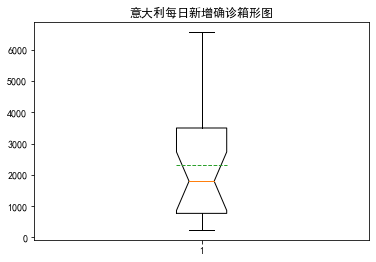

In [5]:
y=list(map(int,data['Italy+']))
plt.boxplot(y,meanline=1,showmeans=1,notch = True)
plt.title('意大利每日新增确诊箱形图')
plt.show()

3.根据德国的每日新增确诊人数，一共3周，绘制饼图。

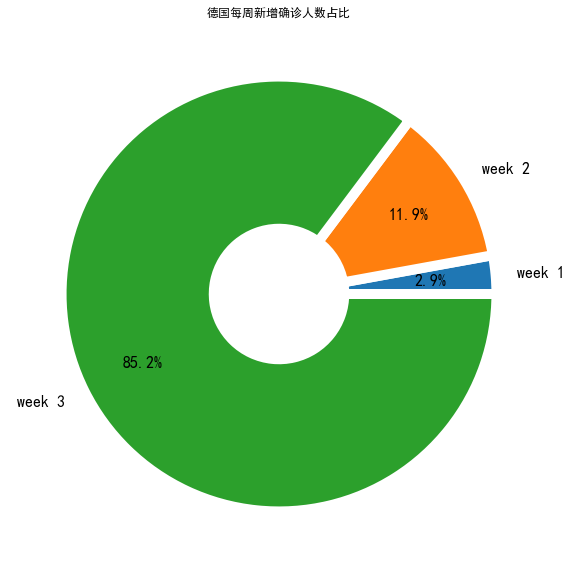

In [6]:
y=list(map(int,data['Germany+']))
w=np.zeros(3)
for i in range(3):
    s=0
    for j in range(7*i,7*(i+1)):
        s+=y[j]
    w[i]=s
plt.figure(figsize=(10,10))
plt.pie(w,labels=['week 1','week 2','week 3'],pctdistance=0.7,autopct='%.1f%%',wedgeprops=dict(edgecolor='w', width=0.7, linewidth=10),textprops= {'fontsize':16,'color':'black'})
plt.title('德国每周新增确诊人数占比')
plt.show()